In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import dataframe_image as dfi



In [5]:
def diagnosis_decoder(code):
    if "V" in str(code): 
        return "External causes of injury and supplemental classification"
    elif "E" in str(code):
        return "External causes of injury and supplemental classification"
    else:
        try:
        
            code = int(code)
            if code<140: return "infectious and parasitic diseases"
            if code<240: return "neoplasms"
            if code<280: return "endocrine, nutritional and metabolic diseases, and immunity disorders"
            if code<290: return "diseases of the blood and blood-forming organs"
            if code<320: return "mental disorders"
            if code<390: return "diseases of the nervous system and sense organs"
            if code<460: return "diseases of the circulatory system"
            if code<520: return "diseases of the respiratory system"
            if code<580: return "diseases of the digestive system"
            if code<630: return "diseases of the genitourinary system"
            if code<680: return "complications of pregnancy, childbirth, and the puerperium"
            if code<710: return "diseases of the skin and subcutaneous tissue"
            if code<740: return "diseases of the musculoskeletal system and connective tissue"
            if code<760: return "congenital anomalies"
            if code<780: return "certain conditions originating in the perinatal period"
            if code<800: return "symptoms, signs, and ill-defined conditions"
            if code<1000: return "injury and poisoning"
        except:
            return(np.nan)
        




In [6]:
def check_categorical_data(data, column_name, allowed_categories):
    data[column_name]= np.where(data[column_name].isin(allowed_categories), data[column_name], np.nan)




def prepare_data(df, columns):
    data = df.copy()

    data.replace("?", np.nan, inplace=True)


    #clean race data
    data.race = data.race.astype(str)
    data.race = data.race.str.capitalize()
    data.race = data.race.replace(["Euro", "European", "White"], "Caucasian")
    data.race = data.race.replace("Latino", "Hispanic")
    data.race = data.race.replace(["Africanamerican", "Afro american", "African american", "Black"], "African American")
    column_name = "race"
    allowed_categories = ["Caucasian", "Hispanic", "African American", "Asian", "Other"]
    check_categorical_data(data, column_name, allowed_categories)


    #clean gender data
    data.gender = data.gender.astype(str)
    data.gender = data.gender.str.capitalize()
    data.gender.replace("Unknown/invalid", np.nan, inplace=True)

    column_name = "gender"
    allowed_categories = ["Male", "Female"]
    check_categorical_data(data, column_name, allowed_categories)


    #check age data
    data.age = data.age.astype(str)
    column_name = "age"
    allowed_categories = ['[50-60)', '[80-90)', '[60-70)', '[70-80)', '[40-50)', '[30-40)',
        '[90-100)', '[20-30)', '[10-20)', '[0-10)']
    check_categorical_data(data, column_name, allowed_categories)
    #code age groups as integers
    data["age_as_int"] = data.age.replace(['[50-60)', '[80-90)', '[60-70)', '[70-80)', '[40-50)', '[30-40)',
    '[90-100)', '[20-30)', '[10-20)', '[0-10)'], [50, 80, 60, 70, 40, 30, 90, 20, 10, 0])


    #clean admission_type_code
    column_name = "admission_type_code"
    data.admission_type_code = data.admission_type_code.astype(float)
    data.admission_type_code = data.admission_type_code.replace([5., 6., 8.], np.nan)
    allowed_categories = [1., 2., 3., 4., 5., 6., 7., 8.]
    check_categorical_data(data, column_name, allowed_categories)
    #keep only common values for admission_type_code, set others as "Other"
    common_categories = [1.0, 3.0, 2.0, np.nan]
    data[column_name] = np.where(data[column_name].isin(common_categories), data[column_name], 'Other')
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].replace("nan", np.nan)


    #discharge_disposition_code
    column_name = "discharge_disposition_code"
    data.discharge_disposition_code = data.discharge_disposition_code.astype(float)
    data.discharge_disposition_code = data.discharge_disposition_code.replace([18., 25., 26.], np.nan)
    allowed_categories = list(np.arange(1.0, 30.0))
    check_categorical_data(data, column_name, allowed_categories)
    #keep only common values for dischage_disposition_code, set others as "Other"
    common_categories = [1.0, 3.0, 6.0, 2.0, 22.0, 5.0, 4.0, 7.0, 23.0, 28.0, 11.0, 13.0, 14.0, 19.0, 20.0, 21.0, np.nan]
    data[column_name] = np.where(data[column_name].isin(common_categories), data[column_name], 'Other')
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].replace("nan", np.nan)


    #admission_source_code
    column_name = "admission_source_code"
    data.admission_source_code = data.admission_source_code.astype(float)
    allowed_categories = list(np.arange(1, 27))
    check_categorical_data(data, column_name, allowed_categories)
    data.admission_source_code = data.admission_source_code.replace([9.0, 15.0, 17.0, 20.0, 21.0], np.nan)
    #keep only common values for admission_source_code, set others as "Other"
    common_categories = [7.0, 1.0, 4.0, 6.0, 2.0, 5.0, 3.0, np.nan]
    data[column_name] = np.where(data[column_name].isin(common_categories), data[column_name], 'Other')
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].replace("nan", np.nan)


    #check vaccination status
    column_name = "complete_vaccination_status"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['Complete', 'Incomplete', 'None']
    check_categorical_data(data, column_name, allowed_categories)


    #check bools
    for column in ["has_prosthesis", "blood_transfusion"]:
        for index, row in data.iterrows():
            if not isinstance(data[column][index], bool):
                if data[column][index] == "True": data.loc[index, column] = True
                else: 
                    try:
                        data[column][index] = data[column][index].astype(float)
                        if data[column][index] == 1: data.loc[index, column] = True
                        else: data.loc[index, column] = False
                    except: data.loc[index, column] = False


    #check floats:
    for column in ["hemoglobin_level"]:
        for index, row in data.iterrows():
            try: data[column][index] = data[column][index].astype(float)
            except: data.loc[index, column]=np.nan
  


    #check integers:
    for column in ["num_lab_procedures","num_medications", "time_in_hospital", "num_procedures", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]:
        for index, row in data.iterrows():
            if not isinstance(data[column][index], int):
                try:
                    data[column][index] = data[column][index].astype(float)
                    if data[column][index]%1==0:  data.loc[index, column]==int(data[column][index])
                    else: data.loc[index, column]=np.nan
                except: data.loc[index, column]=np.nan


    #check values of numerical features:
    for index, row in data.iterrows():
        for column in ["num_lab_procedures", "num_medications", "num_procedures", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]:
            if (data[column][index]>1000) or (data[column][index]<0): data.loc[index, column]=np.nan
        for column in ["time_in_hospital"]:
            if (data[column][index]>40000) or (data[column][index]<0): data.loc[index, column]=np.nan
        for column in ["hemoglobin_level"]:
            if (data[column][index]>100) or (data[column][index]<0): data.loc[index, column]=np.nan

    

    #simplify diagnosis codes
    diag_columns = ['diag_1','diag_2','diag_3']
    for col in diag_columns:
        try:
            data[col] = data[col].astype(str)
            data[f"{col}_simplified"] = data[col].str.replace(r"\.(.*)", "")  #remove any numbers that come after .
            data[f"{col}_simplified"] = data.apply(lambda row: diagnosis_decoder(row[f"{col}_simplified"]),axis=1)
        except: data[f"{col}_simplified"] = np.nan


    #max_glu_serum
    column_name = "max_glu_serum"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['None', '>300', '>200', 'Norm']
    check_categorical_data(data, column_name, allowed_categories)


    #A1Cresult
    column_name = "A1Cresult"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['None', '>7', '>8', 'Norm']
    check_categorical_data(data, column_name, allowed_categories)


    #diuretics
    column_name = "diuretics"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['No', 'Yes']
    check_categorical_data(data, column_name, allowed_categories)


    #insulin
    column_name = "insulin"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['No', 'Yes']
    check_categorical_data(data, column_name, allowed_categories)


    #change
    column_name = "change"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['No', 'Ch']
    check_categorical_data(data, column_name, allowed_categories)


    #diabetesMed
    column_name = "diabetesMed"
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].str.capitalize()
    allowed_categories = ['No', 'Yes']
    check_categorical_data(data, column_name, allowed_categories)




    
    return data[columns]


In [7]:
def check_for_bias(df_test, column_name, preds_proba_column, threshold=0.5, min_size=0):
    df = df_test.copy().dropna()

    sub_groups = []
    wrongful_discharges = []
    lengths = []

    for sub_group in df[column_name].unique():
        df_subgroup = df[df[column_name] == sub_group]
        y_test = df_subgroup["readmitted"]
            #y_pred_test = pipeline.predict(X_test)
        if len(y_test)>=min_size:

            best_preds_test = df_subgroup[preds_proba_column]>threshold

                
            predicted_for_discharge = list(np.where(best_preds_test == False)[0])
            wrongful_discharge = y_test.reset_index(drop=True)[predicted_for_discharge].sum()/len(predicted_for_discharge)

            sub_groups.append(sub_group)
            wrongful_discharges.append(wrongful_discharge)
            lengths.append(len(df_subgroup))

    df = pd.DataFrame([sub_groups, wrongful_discharges, lengths]).transpose()
    df.columns =["sub_group", "readmittion_rate", "size_of_test_data"]
    #df.hist
    return df


In [8]:
with open('dtypes.pickle', 'rb') as fh:
    dtypes = pickle.load(fh)
    

with open('columns.json') as fh:
    columns = json.load(fh)


In [9]:
data = pd.read_csv("data/first_round.csv")
new_data = prepare_data(data, columns)

In [10]:
features_df = pd.DataFrame(list(zip((new_data.isnull().sum()/len(new_data)*100).values, new_data.nunique().values, new_data.dtypes.values)),  
    columns=["% of missing values", "Number of unique values", "Data type"], index=new_data.columns)

In [11]:
new_data.discharge_disposition_code.unique()

array(['1.0', nan, '6.0', '3.0', '23.0', '13.0', '22.0', 'Other', '2.0',
       '4.0', '5.0', '7.0', '28.0', '14.0'], dtype=object)

In [12]:
#is patient insured
payer_codes = list(data.payer_code.dropna().unique())
payer_codes.remove("SP")

data["isInsured"] = data.payer_code.replace(list(payer_codes), True)
data["isInsured"] = data.isInsured.replace("SP", False)

In [13]:
new_data["readmitted"] = data["true_class"]
new_data["pred_proba"] = data["readmitted_proba"]
new_data["age"] = data["age"]
new_data["medical_specialty"] = data["medical_specialty"]
new_data["isInsured"] = data["isInsured"]


new_data.dropna(subset=["readmitted"], inplace=True)

In [20]:

features = ["race", "age", "gender", "isInsured", "medical_specialty"]

best_subgroups = []
worst_subgroups = []
max_rates = []
min_rates =[]

for group in features:
        
    data_to_plot = check_for_bias(new_data, group,  "pred_proba", 0.5, min_size=50)
    data_to_plot = data_to_plot.sort_values(by="sub_group")
    data_to_plot.readmittion_rate = data_to_plot.readmittion_rate*100

    max_rate = max(data_to_plot.readmittion_rate)
    min_rate = min(data_to_plot.readmittion_rate)
    max_rate_subgroup = data_to_plot.sub_group.iloc[np.where(data_to_plot.readmittion_rate == max_rate)].values[0]
    min_rate_subgroup = data_to_plot.sub_group.iloc[np.where(data_to_plot.readmittion_rate == min_rate)].values[0]

    print(max_rate_subgroup, max_rate)
    print(min_rate_subgroup, min_rate)
    print(max_rate-min_rate)
    
    print("#######")

    best_subgroups.append(min_rate_subgroup)
    worst_subgroups.append(max_rate_subgroup)
    max_rates.append(max_rate.round(2))
    min_rates.append(min_rate.round(2))

df = pd.DataFrame([features,worst_subgroups, max_rates,  best_subgroups, min_rates, [mx-mn for mx, mn in zip(max_rates, min_rates)]])
df = df.transpose()
df.columns = ["Feature", "Group with highest rate", "Highest rate", "Group with lowest rate", "Lowest rate", "Difference"]
df = df.set_index("Feature", drop = True)
dfi.export(df, "test1_requirements_table_at_least_50.png")


African American 8.413461538461538
Hispanic 4.545454545454546
3.8680069930069925
#######
[90-100) 12.698412698412698
[20-30) 4.285714285714286
8.412698412698411
#######
Female 7.761194029850746
Male 7.281059063136457
0.4801349667142887
#######
True 7.572919454107573
False 6.751054852320674
0.8218646017868982
#######
Psychiatry 16.666666666666664
Surgery-Cardiovascular/Thoracic 2.380952380952381
14.285714285714283
#######


[0301/111100.141868:ERROR:gpu_init.cc(441)] Passthrough is not supported, GL is swiftshader
[0301/111100.695131:INFO:headless_shell.cc(648)] Written to file /tmp/tmpoyn6485w/temp.png.


In [25]:
(new_data.medical_specialty=="Anesthesiology").sum()

1

In [28]:
(new_data.age=="[0-10)").sum()

10

In [35]:
new_data.payer_code.unique()

AttributeError: 'DataFrame' object has no attribute 'payer_code'

In [36]:
new_data.drop(["pred_proba", "age", "medical_specialty", "isInsured"], axis=1).to_csv("data/first_round_to_model", index=False)

In [3]:
new_data = pd.read_csv("data/first_round_to_model")
old_data = pd.read_csv("data/data1_to_model")

In [4]:
def plot_figure(fig_width=2, fig_height=2):
    #define apeearance of figures

    COLOR = 'black'


    # Edit the font, font size, color and axes width

    plt.rcParams['font.size'] = 15
    plt.rcParams['axes.linewidth'] = 0.5

    tick_size=3
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR


    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(fig_width, fig_height))

    # Add axes object to the figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])


    # Edit the major and minor ticks of the x and y axes
    ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')

    return fig, ax




def get_readmittion_rates(data, column_name, min_size=0, min_size_wrong=0):
    df = data.copy()
    df.dropna(subset = [column_name], inplace=True)
    groups = df[column_name].unique()

    readmittion_rates = []
    groups_to_consider = []
    sample_size = []

    for group in groups:
        group_df = df[df[column_name]==group]
        if len(group_df) >= min_size:
            num_wrong_discharge = group_df.readmitted.sum()
            if num_wrong_discharge>=min_size_wrong:
                groups_to_consider.append(group)
                readmittion_rates.append(num_wrong_discharge/len(group_df))
                sample_size.append(len(group_df))


    
    return groups_to_consider, readmittion_rates, sample_size


def check_for_discrimination(data, column_name, subgroup = False, min_size=0, min_size_wrong=0):

    df = data.copy()
    df.readmitted = df.readmitted.replace(["Yes", "No"], [True, False])
    
    if subgroup:
        column_values = df[subgroup].unique()
        for column_value in column_values:
            df_subgroup = df[df[subgroup]==column_value]
            df_subgroup.dropna(subset = [subgroup], inplace=True)
            return get_readmittion_rates(df_subgroup, column_name, min_size, min_size_wrong)

    else: 
        return get_readmittion_rates(df, column_name, min_size, min_size_wrong)



In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

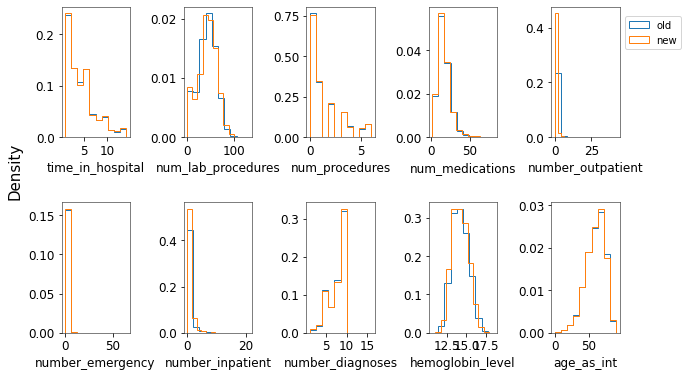

In [45]:

numerical_columns = [column for column in columns if dtypes[column] == float]

n_cols = 5
if len(numerical_columns)/n_cols == len(numerical_columns)//n_cols: n_rows = len(numerical_columns)//n_cols
else : n_rows = len(numerical_columns)//n_cols+1
fig, ax = plot_figure(fig_width=n_cols*2, fig_height=2*n_rows+2)

for plot_num, column in enumerate(numerical_columns):
    ax = plt.subplot(n_rows, n_cols, plot_num+1)
    ax.hist(old_data[column].values, histtype= "step", density=True, label="old")
    ax.hist(new_data[column].values, histtype= "step", density=True, label="new")
   
    ax.set_xlabel(column, fontsize=12)
    if plot_num==4: ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), fontsize=10)
    plt.xticks(fontsize= 12) 
    plt.yticks(fontsize= 12)


plt.subplots_adjust(hspace=0.5, wspace = 0.8)
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical')
fig.savefig(f'numerical_values_comparison.png', dpi=300, transparent=True, bbox_inches='tight')



In [6]:
def get_subgroup_percentages(data, column, subgroups):
    percentages = []
    for subgroup in subgroups:
        percentages.append((data[column]==subgroup).sum()/len(data.dropna(subset=[column])))
    return percentages

Text(0.06, 0.5, '% of data')

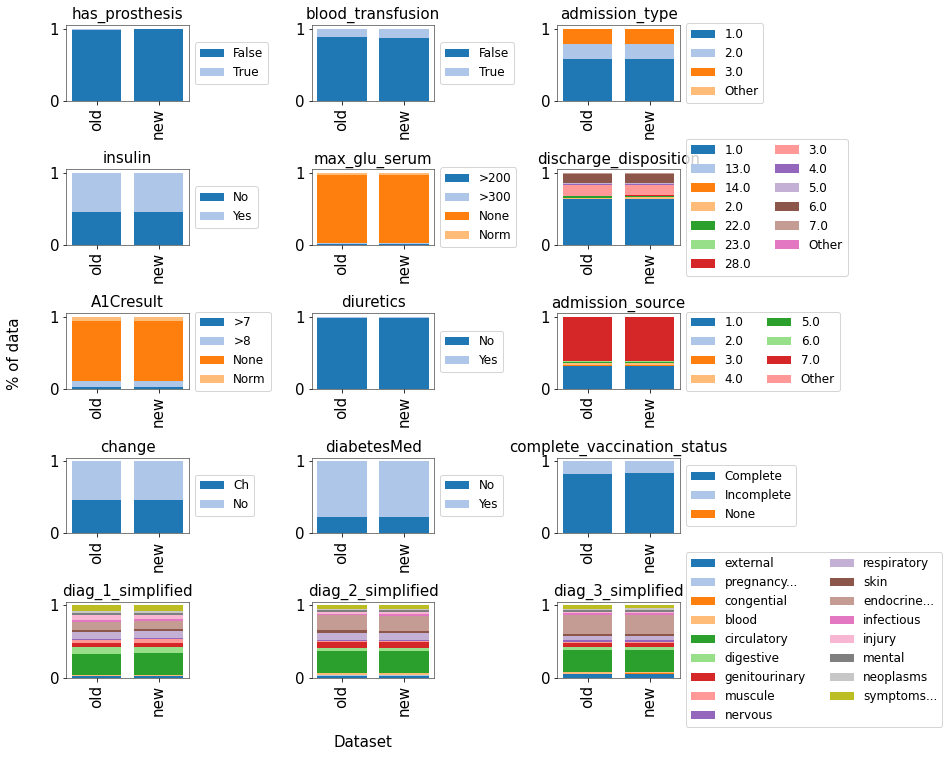

In [13]:
colors = plt.get_cmap("tab20").colors
diagnosis_legend = ["external", "pregnancy...", "congential", "blood", "circulatory", "digestive", "genitourinary", "muscule", "nervous", "respiratory", "skin", "endocrine...", "infectious", "injury", "mental", "neoplasms", "symptoms..."]

#nonnumerical_columns = [column for column in columns if dtypes[column] != float]

nonnumerical_columns  = ["has_prosthesis", "blood_transfusion", "admission_type_code", "insulin", "max_glu_serum", "discharge_disposition_code", 
"A1Cresult", "diuretics", "admission_source_code", "change", "diabetesMed", "complete_vaccination_status", "diag_1_simplified", "diag_2_simplified", "diag_3_simplified"]

n_cols = 3
bar_width=0.8
if len(nonnumerical_columns)/n_cols == len(nonnumerical_columns)//n_cols: n_rows = len(nonnumerical_columns)//n_cols
else : n_rows = len(nonnumerical_columns)//n_cols+1
fig, ax = plot_figure(fig_width=n_cols*2+5, fig_height=2*n_rows+2)

new_axs = []
for plot_num, column in enumerate(nonnumerical_columns):
    ax = plt.subplot(n_rows, n_cols, plot_num+1)

  
    subgroups = pd.concat([new_data, old_data])[column].dropna().unique()
    subgroups = sorted(subgroups)


    old_percentages = get_subgroup_percentages(old_data, column, subgroups)
    new_percentages = get_subgroup_percentages(new_data, column, subgroups)

    cumulative_perc=0
    label_i=0
    for subgroup, percentage, color in zip(subgroups, old_percentages, colors):
        if plot_num==14: 
            ax.bar("old", percentage, bar_width,  bottom=cumulative_perc, label=diagnosis_legend[label_i], color=color)
            label_i+=1

        else: ax.bar("old", percentage, bar_width,  bottom=cumulative_perc, label=subgroup, color=color)
        cumulative_perc+=percentage
        

    if (plot_num==14 or plot_num==8 or plot_num==5): ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, ncol=2)

    elif plot_num != 12 and plot_num!=13:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)


    cumulative_perc=0
    for subgroup, percentage, color in zip(subgroups, new_percentages, colors):
        ax.bar("new", percentage, bar_width,  bottom=cumulative_perc, label=subgroup, color=color)
        cumulative_perc+=percentage
    
    plt.xticks(fontsize= 15, rotation=90) 
    plt.yticks(fontsize= 15)
    plt.title(column.replace("_code", ""), fontsize=15)


plt.subplots_adjust(hspace=0.9, wspace = 1.0)
fig.text(0.5, 0.05, 'Dataset', ha='center', va='center')
fig.text(0.06, 0.5, '% of data', ha='center', va='center', rotation='vertical')
#fig.savefig(f'categorical_values_comparison.png', dpi=300, transparent=True, bbox_inches='tight')



In [14]:
fig.savefig(f'categorical_values_comparison.png', dpi=300, transparent=True, bbox_inches='tight')
